In [ ]:
# Clear all existing variables
for name in dir(): 
    if not name.startswith('_'): 
        del globals()[name]
on=1; off=0 
Periodic=on

In [2]:
#packages
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from numpy import random

In [3]:
# Widening the screen
from matplotlib import rcParams
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

rcParams['figure.dpi'] = 300
rcParams['font.size'] = 16
rcParams['font.family'] = 'StixGeneral'
plt.rc('font', size=16)          # controls default text sizes
plt.rc('axes', titlesize=16)     # fontsize of the axes title
plt.rc('axes', labelsize=16)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.rc('figure', titlesize=16)   # fontsize of the figure title

In [4]:
#grid
LX =320
LT =320
LI =12
dx =1

In [5]:
#parameter
#a
Da =0.01
ra =0.05
ba =0.05
#b
Db =0.4
rb =0.08
bb =0
s  =ra*(0.95+0.1*random.random())

In [6]:
#initial value
a     =random.random(LX+1)+2.7
b     =np.zeros(LX+1)+0.7
Ma    =np.zeros((LT,LX+1))
Mb    =np.zeros((LT,LX+1))

In [7]:
#diffuse
def d2_dx2(Z): 
    Zleft = np.roll(Z, 1, axis=0)
    Zright = np.roll(Z, -1, axis=0)
    return (Zleft + Zright   - 2.0 * Z) / dx**2

In [8]:
#simulation
for j in range(int(LT)):
    for i in range(int(LI)):
        a, b = \
        a + ( s*(a*a/b + ba) - ra*a + Da*d2_dx2(a) ),\
        b + ( s*a*a - rb*b + Db*d2_dx2(b) + bb )
    Ma[j,:] = a
    Mb[j,:] = b

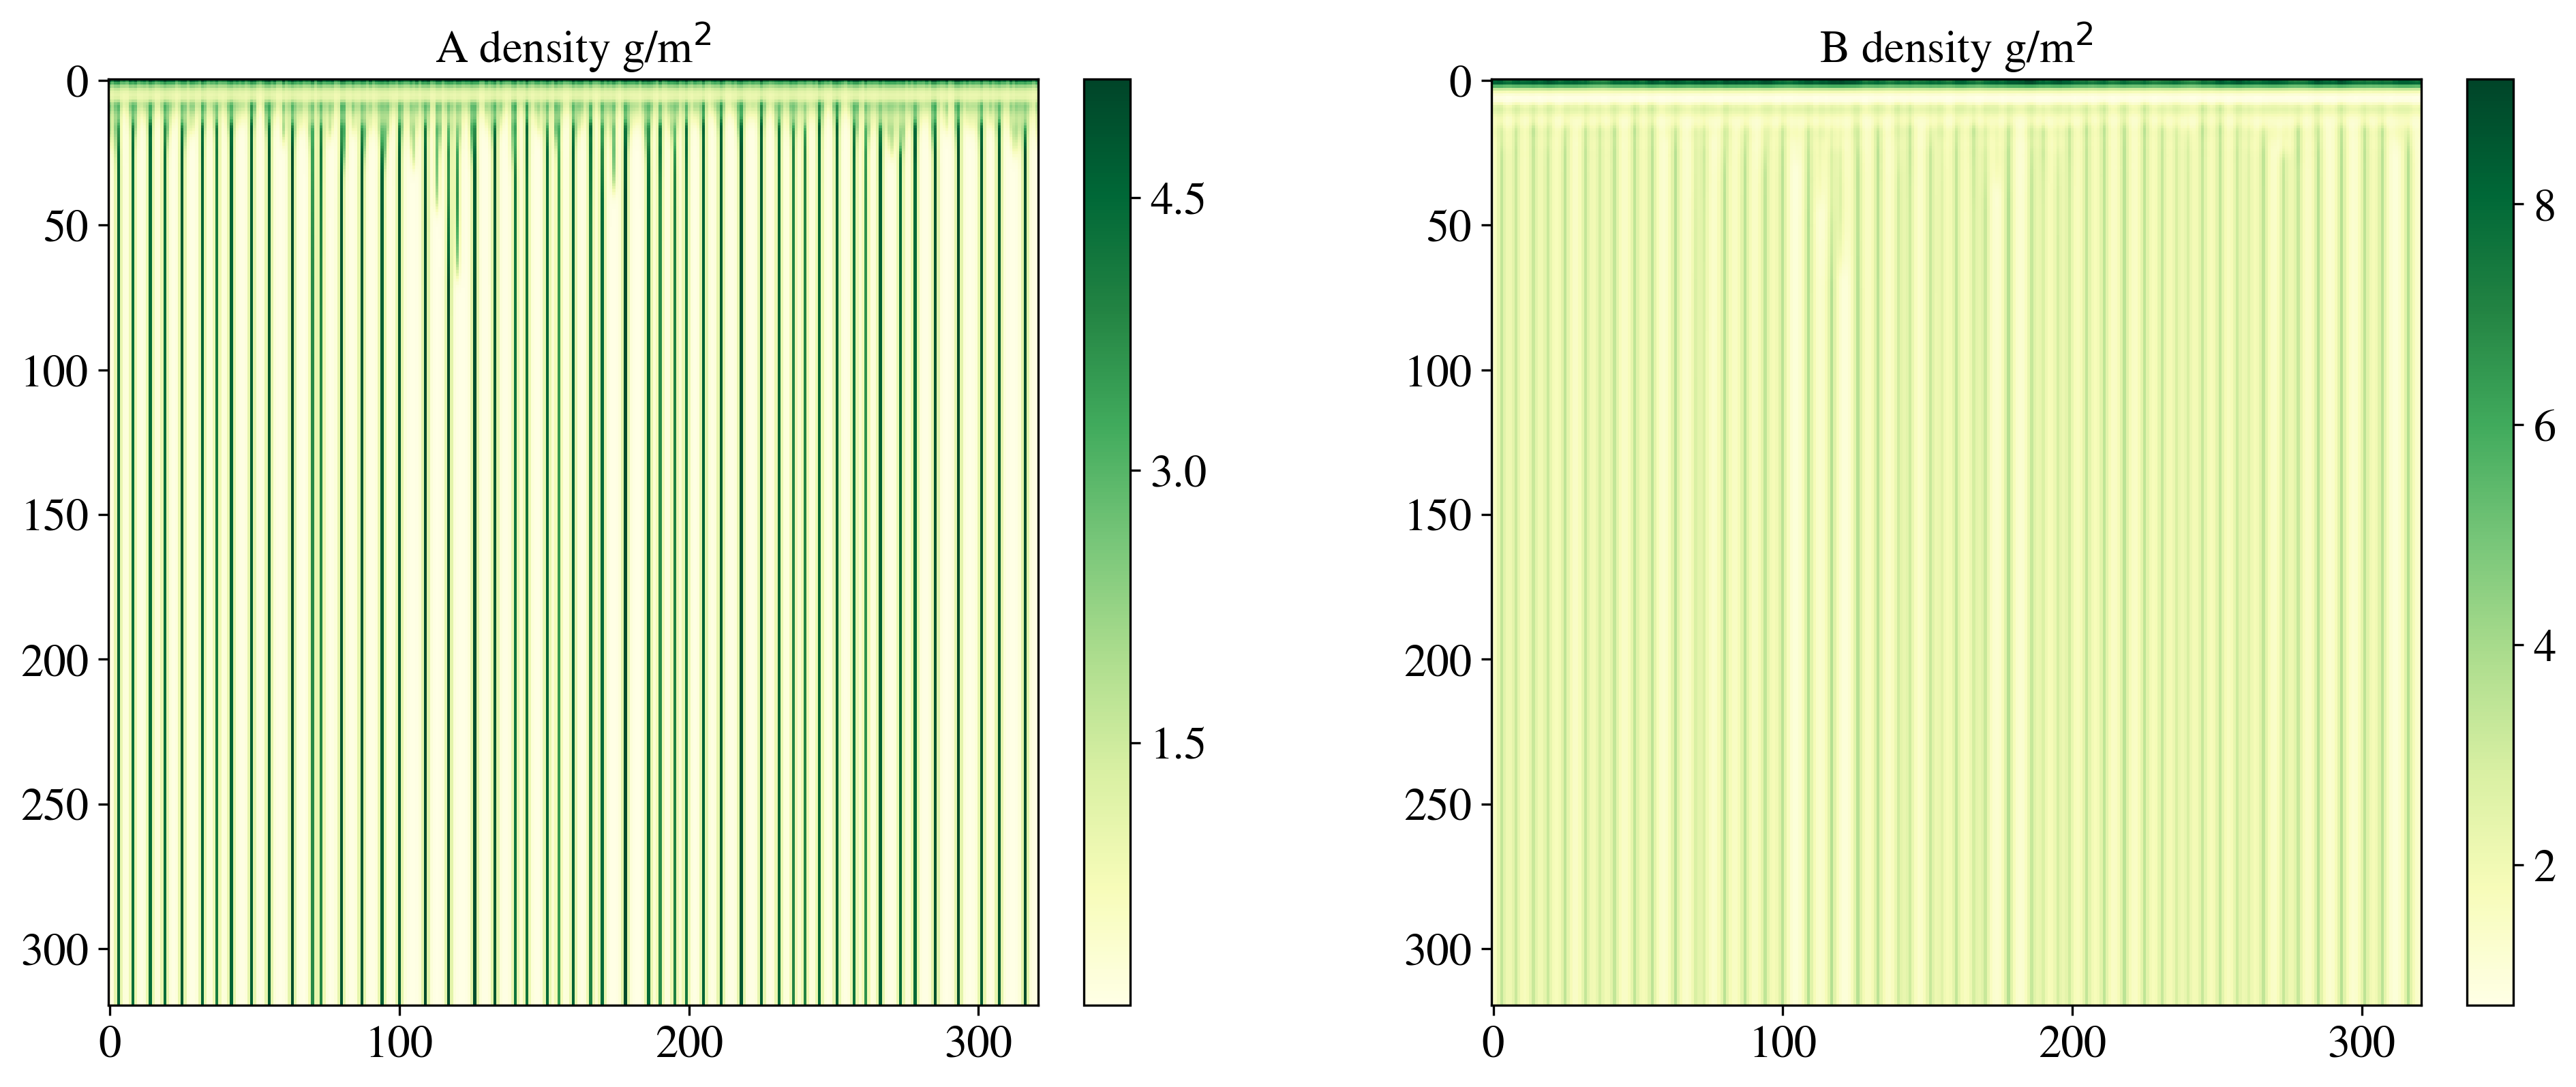

In [9]:
from matplotlib import ticker
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
im0 = ax[0].imshow(Ma,cmap='YlGn');#, clim=(0,0.1));
ax[0].set_title('A density g/m$^2$');
cbar=plt.colorbar(im0, ax=ax[0],fraction=0.046,pad=0.04);
tick_locator = ticker.MaxNLocator(nbins=5)
cbar.locator = tick_locator
cbar.update_ticks()

im1 = ax[1].imshow(Mb,cmap='YlGn');#, clim=(0,0.5));
ax[1].set_title('B density g/m$^2$');
cbar=plt.colorbar(im1, ax=ax[1],fraction=0.046,pad=0.04);
tick_locator = ticker.MaxNLocator(nbins=5)
cbar.locator = tick_locator
cbar.update_ticks()
plt.savefig('1.|||.png', dpi=350)

© 2020